In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import re
import pandas as pd
import numpy as np
#from scipy.special import gamma as GammaFunction
import arviz as az
import bambi as bmb
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import attila_utils
import mwm

In [2]:
treatments_CO26990 = {
    'A': 'WT',
    'B': '5xFAD',
    'C': '5xFAD + Amiloride',
}

treatments_CO28152 = {
    'A': '5xFAD + Amiloride',
    'B': '5xFAD + HCQ',
    'C': '5xFAD + HCQ nano',
    'D': '5xFAD',
    'E': '5xFAD + R-HCQ',
    'F': '5xFAD + S-HCQ',
    'G': '5xFAD + TUDCA',
    'H': 'WT',
    'I': 'WT + TUDCA',
    'J': 'WT + DMSO',
}

treatments_CO28154 = {
    'A': 'Saline',
    #'B': 'Amiloride + HCQ', # absent from data
    'C': 'TUDCA + HCQ',
    'D': 'Arundine low dose',
    'E': 'Arundine mid dose',
    'F': 'Arundine high dose',
    'G': 'Vehicle (Arundine)',
    'H': 'Arundine high dose WT',
    #'I': 'Amiloride + HCQ WT', # absent from data
    'J': 'TUDCA + HCQ WT',
    'K': 'Saline WT',
    'L': 'Vehicle (Arundine) WT',
}


fpath_CO26990 = '../../resources/QPS/5xFAD-mouse/CO26990-behavioral-data-cleaned.xlsx'
fpath_CO28152 = '../../resources/QPS/5xFAD-mouse/CO28152-behavioral-data-cleaned.xlsx'
fpath_CO28154 = '../../resources/QPS/5xFAD-mouse/CO28154-behavioral-data-cleaned.xlsx'

fpathl = [fpath_CO26990, fpath_CO28152, fpath_CO28154]
treatmentsl = [treatments_CO26990, treatments_CO28152, treatments_CO28154]
sheet_namel = ['rawdata MWM day 1-4', 'rawdata MWM day 1-4', 'MWM day 1-4']

Z = zip(fpathl, treatmentsl, sheet_namel)

data_CO26990, data_CO28152, data_CO28154 = [mwm.read_data_train(f, t, sheet_name=s) for f, t, s in Z]
data_CO28154.head()

Latency  Distance (cm)  Velocity (cm/s)  \
cohort group sex irn   day                                              
II     A     f   15721 Day 1    52.74     1015.22075        19.086425   
                       Day 2    60.08     1088.82750        18.147125   
                       Day 3    50.68      915.51800        16.998050   
                       Day 4    42.36      683.79500        14.696975   
                 15725 Day 1    54.10      994.20225        18.210400   

                              Thigmotaxis  Floating Cohort Group Sex    IRN  \
cohort group sex irn   day                                                    
II     A     f   15721 Day 1    41.474975  1.507714     II     A   f  15721   
                       Day 2    58.022650  0.499334     II     A   f  15721   
                       Day 3    37.496623  3.224045     II     A   f  15721   
                       Day 4    17.884725  4.353538     II     A   f  15721   
                 15725 Day 1    52.676225  1.860057     II     A   f  15725   

                              Day Condition Status  
cohort group sex irn   day                          
II     A     f   15721 Day 1  1.0    Saline   none  
                       Day 2  2.0    Saline  right  
                       Day 3  3.0    Saline   none  
                       Day 4  4.0    Saline   none  
                 15725 Day 1  1.0    Saline   none

In [3]:
experiments_CO28154 = {
    #'Amiloride + HCQ': (data_CO28154, ['Saline', 'Amiloride + HCQ', 'Saline WT']), # absent from data
    'TUDCA + HCQ': (data_CO28154, ['Saline', 'TUDCA + HCQ', 'Saline WT']),
    'Arundine low dose': (data_CO28154, ['Vehicle (Arundine)', 'Arundine low dose', 'Vehicle (Arundine) WT']),
    'Arundine mid dose': (data_CO28154, ['Vehicle (Arundine)', 'Arundine mid dose', 'Vehicle (Arundine) WT']),
    'Arundine high dose': (data_CO28154, ['Vehicle (Arundine)', 'Arundine high dose', 'Vehicle (Arundine) WT']),
    'Arundine high dose WT': (data_CO28154, ['Vehicle (Arundine) WT', 'Arundine high dose WT', 'Vehicle (Arundine)']),
    #'Amiloride + HCQ WT': (data_CO28154, ['Saline WT', 'Amiloride + HCQ WT', 'Saline']), # absent from data
    'TUDCA + HCQ WT': (data_CO28154, ['Saline WT', 'TUDCA + HCQ WT', 'Saline']),
}


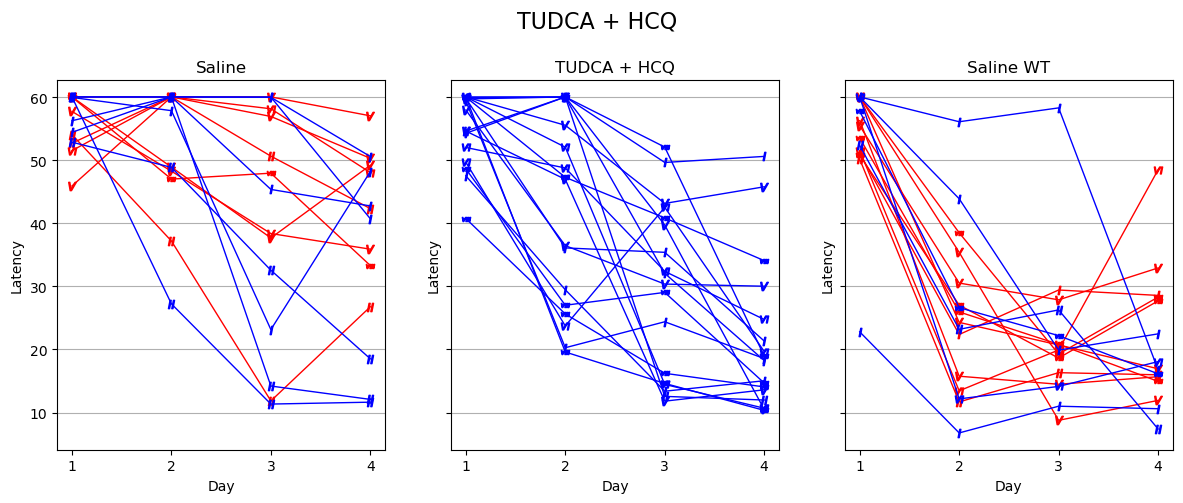

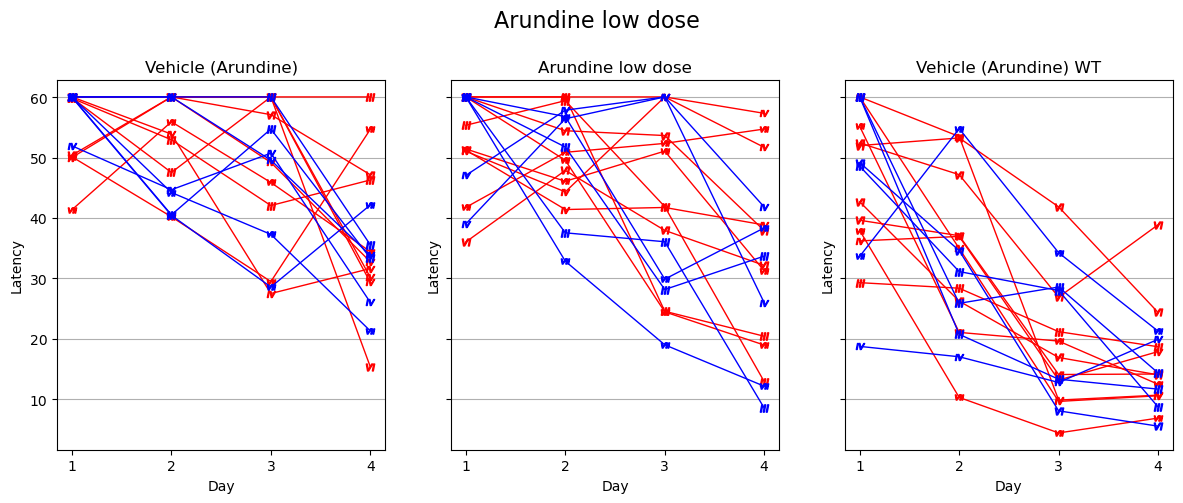

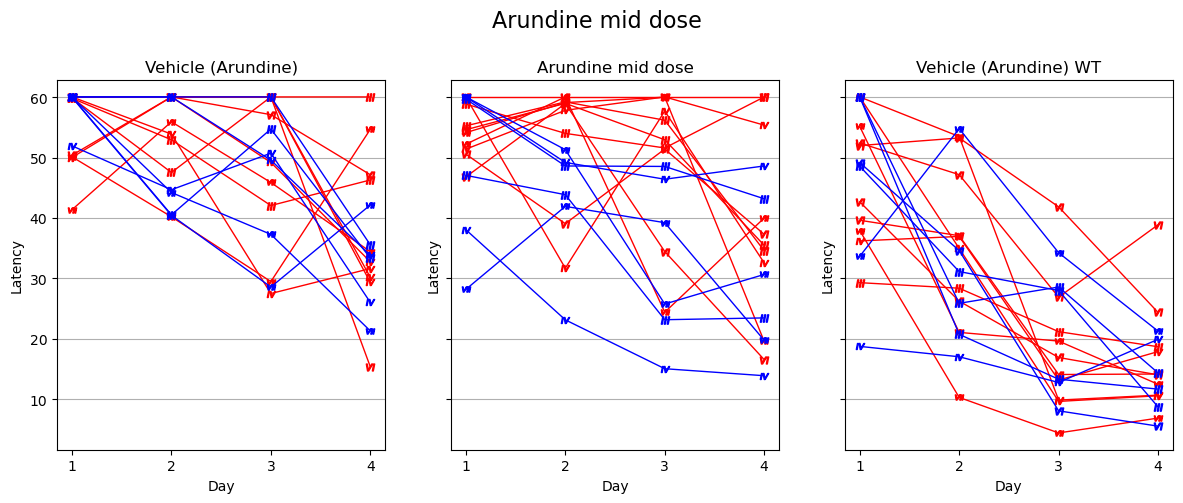

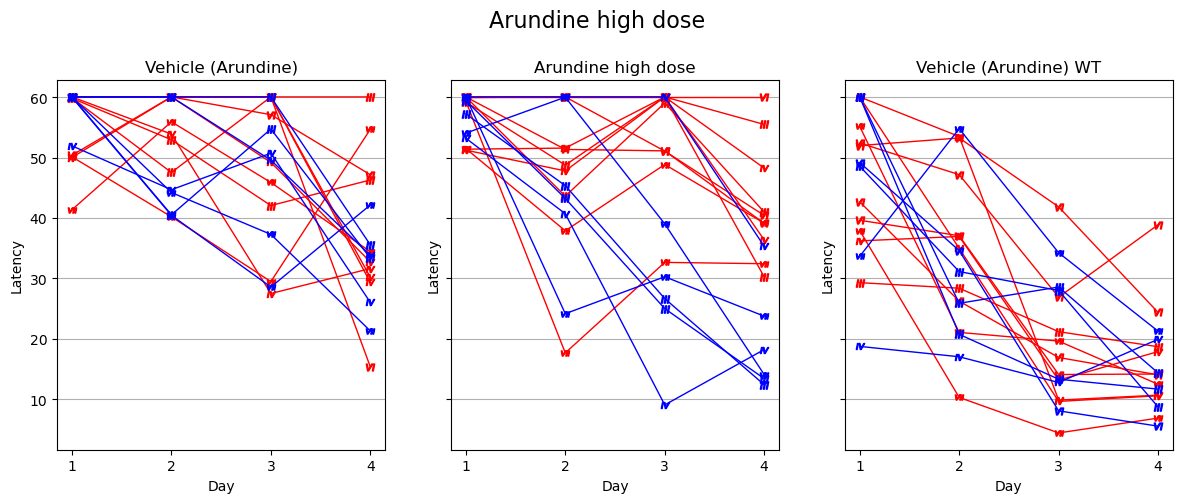

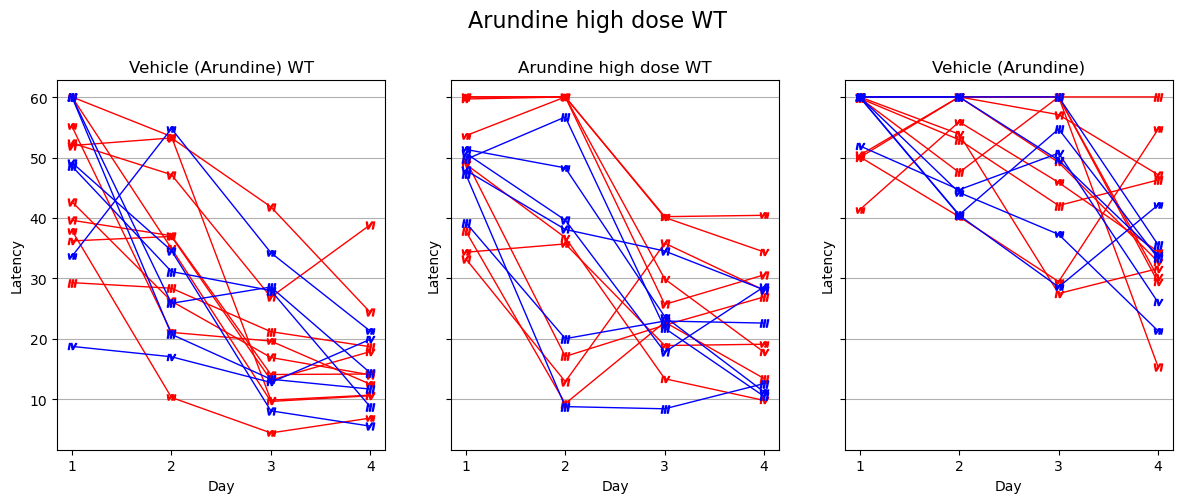

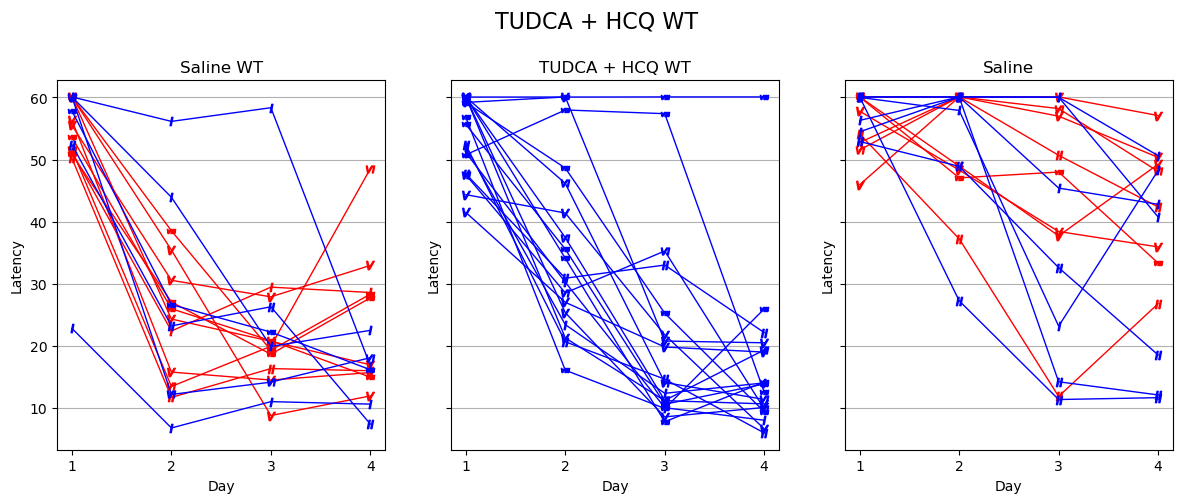

In [4]:
for k, v in experiments_CO28154.items():
    fig, ax = mwm.escape_latency_plotter(k, *v)
    attila_utils.savefig(fig, 'latency-' + k.replace(' ', '-'))

In [5]:
%connect_info

{
  "shell_port": 61146,
  "iopub_port": 61147,
  "stdin_port": 61148,
  "control_port": 61150,
  "hb_port": 61149,
  "ip": "127.0.0.1",
  "key": "68f4afbd-3317b83847fe6897c9e9690d",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": "python3",
  "jupyter_session": "/Users/jonesa7/CTNS/notebooks/2024-06-04-5xfad-behavior-CO28154/Untitled.ipynb"
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-a72e7df2-0908-4aad-afee-b3be938c133a.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
